# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


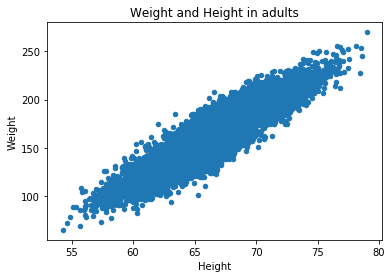

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

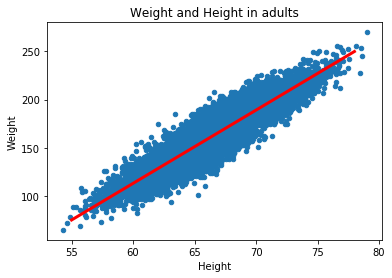

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
yhat = line(x, w=7.69156122, b=-349.17303467)

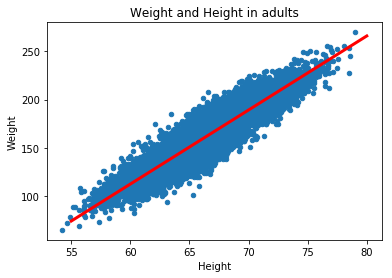

In [10]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [11]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [12]:
X = df[['Height']].values
y_true = df['Weight'].values

In [13]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [14]:
y_pred = line(X, w=7.69156122, b=-349.17303467)

In [15]:
y_pred

array([[218.82581763],
       [179.86719113],
       [220.84937797],
       ...,
       [142.07153744],
       [181.80807265],
       [127.27492474]])

In [16]:
mean_squared_error(y_true, y_pred.ravel())

149.3237990789568

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

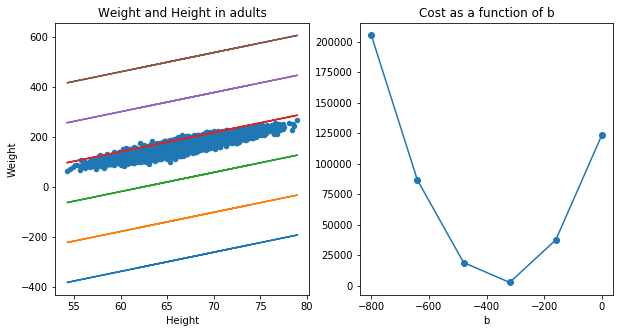

In [17]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.linspace(-800, 0, 6)
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=7.69156122, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


In [19]:
model = Sequential()

In [20]:
model.add(Dense(1, input_shape=(1,)))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [23]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 91us/step - loss: 812.9688
Epoch 2/40
10000/10000 [==============================] - 0s 20us/step - loss: 570.2539
Epoch 3/40
10000/10000 [==============================] - 0s 19us/step - loss: 534.7180
Epoch 4/40
10000/10000 [==============================] - 0s 14us/step - loss: 475.9837
Epoch 5/40
10000/10000 [==============================] - 0s 15us/step - loss: 423.3923
Epoch 6/40
10000/10000 [==============================] - 0s 17us/step - loss: 378.4632
Epoch 7/40
10000/10000 [==============================] - 0s 16us/step - loss: 352.3169
Epoch 8/40
10000/10000 [==============================] - 0s 16us/step - loss: 304.5051
Epoch 9/40
10000/10000 [==============================] - 0s 15us/step - loss: 287.0292
Epoch 10/40
10000/10000 [==============================] - 0s 16us/step - loss: 265.6337: 0s - loss: 266.762
Epoch 11/40
10000/10000 [==============================] - 0s 16us/step - loss: 256.4569
Epoch 12/4

In [24]:
y_pred = model.predict(X)

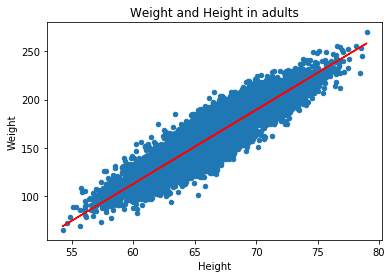

In [25]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [26]:
W, B = model.get_weights()

In [27]:
W, B

(array([[7.6844106]], dtype=float32), array([-348.56915], dtype=float32))

## Evaluating Model Performance

In [28]:
from sklearn.metrics import r2_score

In [29]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.855


### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [32]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [33]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [34]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [35]:
from sklearn.metrics import mean_squared_error as mse

In [36]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	249.7
The Mean Squared Error on the Test set is:	253.9


In [37]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.759
The R2 score on the Test set is:	0.748


# Classification

In [38]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [39]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


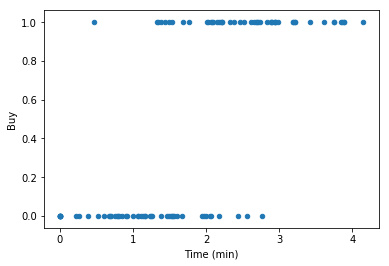

In [40]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [41]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [42]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 0.7501 - acc: 0.5200
Epoch 2/25
100/100 [==============================] - 0s 50us/step - loss: 0.6562 - acc: 0.5100
Epoch 3/25
100/100 [==============================] - 0s 40us/step - loss: 0.6098 - acc: 0.7000
Epoch 4/25
100/100 [==============================] - 0s 40us/step - loss: 0.6100 - acc: 0.7000
Epoch 5/25
100/100 [==============================] - 0s 50us/step - loss: 0.5376 - acc: 0.7900
Epoch 6/25
100/100 [==============================] - 0s 60us/step - loss: 0.5276 - acc: 0.7700
Epoch 7/25
100/100 [==============================] - 0s 50us/step - loss: 0.5002 - acc: 0.8100
Epoch 8/25
100/100 [==============================] - 0s 50us/step - loss: 0.4834 - acc: 0.7900
Epoch 9/25
100/100 [==============================] - 0s 40us/step - loss: 0.4814 - acc: 0.8100
Epoch 10/25
100/100 [==============================] - 0s 30us/step - loss: 0.4655 - acc: 0.8300
Epoch 11/25
100/100 [===================

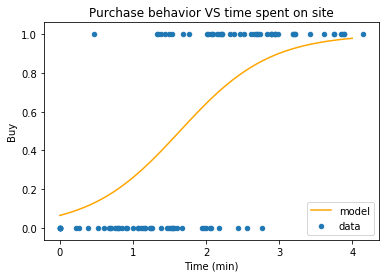

In [45]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [46]:
temp_class = model.predict(temp) > 0.5

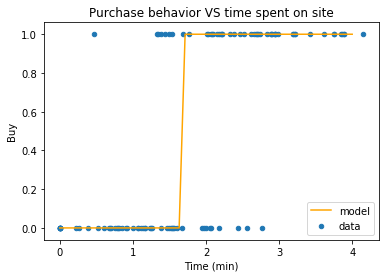

In [47]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [48]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
model.get_weights()

[array([[1.6278121]], dtype=float32), array([-2.674355], dtype=float32)]

In [53]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [54]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [55]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [56]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.850


## Cross Validation

In [57]:
from keras.wrappers.scikit_learn import KerasClassifier

In [58]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [59]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [60]:
from sklearn.model_selection import cross_val_score, KFold

In [61]:
cv = KFold(4, shuffle=True)

In [62]:
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.80000001, 0.80000001, 0.88      , 0.72000003])

In [63]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8000 ± 0.0566


## Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y, y_class_pred)

array([[40, 10],
       [ 7, 43]], dtype=int64)

In [66]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [67]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,40,10
Buy,7,43


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.811
Recall:  	0.860
F1 Score:	0.835


In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.81      0.86      0.83        50

   micro avg       0.83      0.83      0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [72]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [73]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [74]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [75]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [76]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [78]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


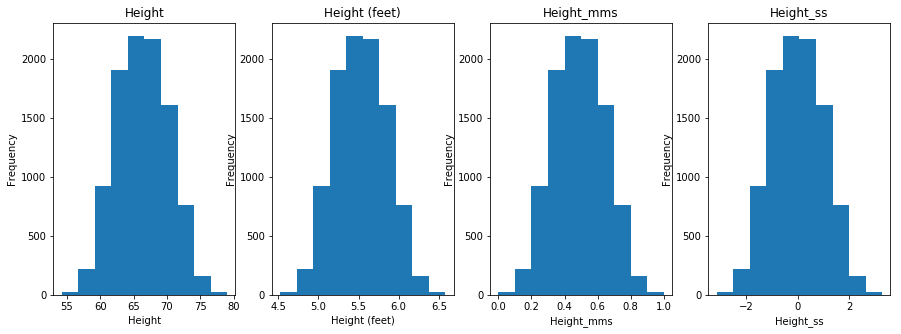

In [79]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [80]:
df = pd.read_csv('../data/housing-data.csv')

In [81]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


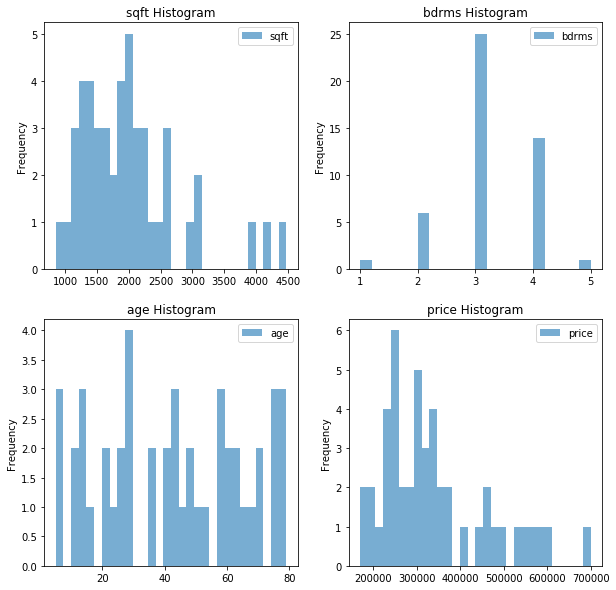

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
df.plot(y='sqft', ax=ax[0,0], kind='hist', bins=30, title='sqft Histogram', alpha=0.6)
df.plot(y='bdrms', ax=ax[0,1], kind='hist', bins=20, title='bdrms Histogram', alpha=0.6)
df.plot(y='age', ax=ax[1,0], kind='hist', bins=30, title='age Histogram', alpha=0.6)
df.plot(y='price', ax=ax[1,1], kind='hist', bins=30, title='price Histogram', alpha=0.6)

In [83]:
X = df[['sqft','bdrms','age']].values
y = df[['price']].values

In [84]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
model.fit(X_train, y_train)

Epoch 1/1
37/37 [==============================] - 0s 4ms/step - loss: 132169853979.6757


In [87]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [88]:
# Rescale features
df['sqft1000'] = df.sqft / 1e3
df['age10'] = df.age / 10.
df['price100k'] = df.price / 1e5

In [89]:
X = df[['sqft1000','bdrms','age10']].values
y = df['price100k'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=40, verbose=False)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-0.078
The R2 score on the Test set is:	-2.642


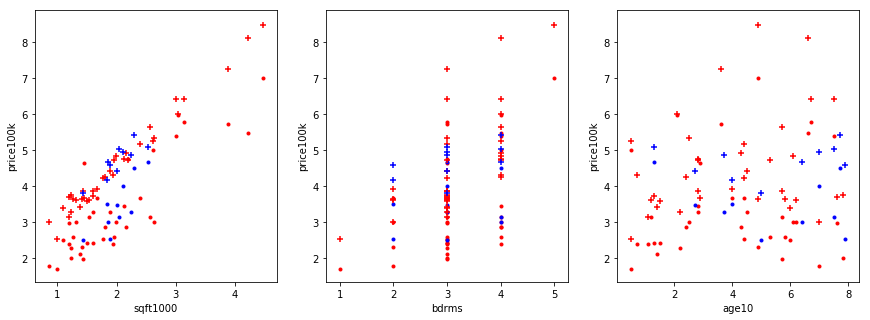

In [92]:
col = df[['sqft1000','bdrms','age10']].columns
X_ = [X_train, X_test, X_train, X_test]
y_ = [y_train, y_test, y_train_pred, y_test_pred]
m = ['.', '.', '+', '+']
c = ['r', 'b', 'r', 'b']

plt.figure(figsize=(20, 5))
for i, feature in enumerate(col):
    plt.subplot(1, 4, i+1)
    for j in range(4):
        plt.scatter(X_[j][:,i], y_[j], marker=m[j], c=c[j])
    plt.xlabel(feature)
    plt.ylabel('price100k')

In [93]:
from keras.optimizers import RMSprop, Adamax

In [94]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adamax(lr=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=40, verbose=False)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.700
The R2 score on the Test set is:	0.469


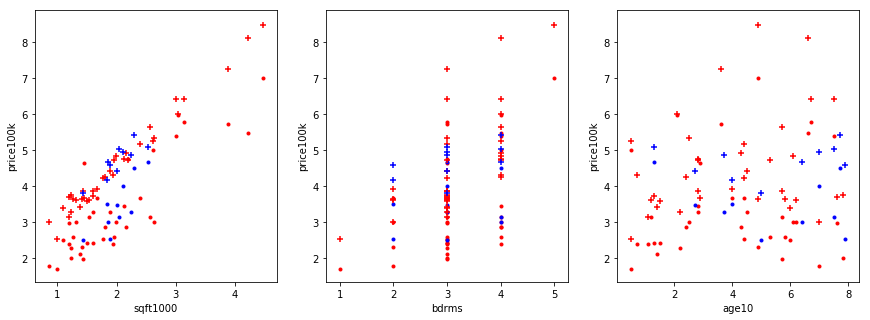

In [95]:
plt.figure(figsize=(20, 5))
for i, feature in enumerate(col):
    plt.subplot(1, 4, i+1)
    for j in range(4):
        plt.scatter(X_[j][:,i], y_[j], marker=m[j], c=c[j])
    plt.xlabel(feature)
    plt.ylabel('price100k')

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [96]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [97]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [99]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [100]:
df['left_pred'] = 0

In [101]:
print("The accuracy score is {:0.3f}".format(accuracy_score(df.left.values, df.left_pred.values)))

The accuracy score is 0.762


In [102]:
pretty_confusion_matrix(df.left.values, df.left_pred.values, ['Not Left', 'Left'])

,Predicted Not Left,Predicted Left
Not Left,11428,0
Left,3571,0


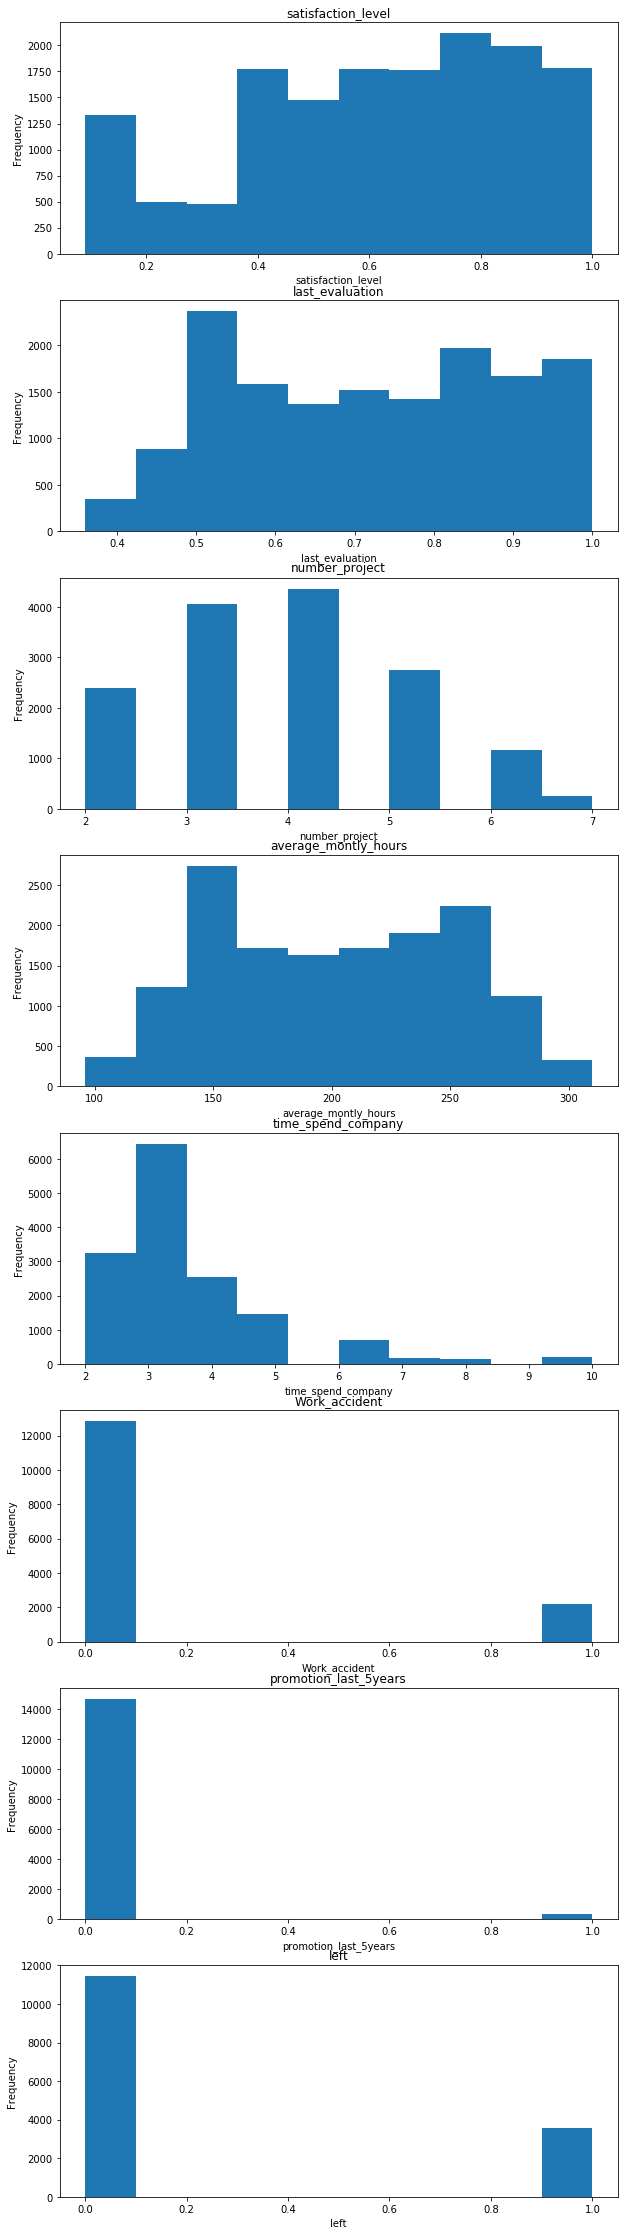

In [103]:
col = ['satisfaction_level', 'last_evaluation', 'number_project', 
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'left'
      ]

plt.figure(figsize=(10, 5*len(col)))

for i, feature in enumerate(col):
    plt.subplot(len(col), 1, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [104]:
df['average_montly_hours_100'] = df['average_montly_hours'] / 100.

In [105]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [106]:
df = pd.concat([df,df_dummies], axis=1)

In [107]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'left_pred',
       'average_montly_hours_100', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [108]:
col = ['satisfaction_level', 'last_evaluation', 'number_project',  'time_spend_company', 
       'Work_accident', 'promotion_last_5years', 'average_montly_hours_100', 
       'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing', 
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 
       'salary_high', 'salary_low', 'salary_medium'
      ]

X = df[col].values
y = df['left'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X.shape

(14999, 20)

In [110]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(X_train, y_train, epochs=30, verbose=False)

In [112]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The accuracy score  on the Train set is {:0.3f}".format(accuracy_score(y_train, y_train_pred)))

The accuracy score  on the Train set is 0.789


In [113]:
y_class_pred = model.predict_classes(X)

In [114]:
pretty_confusion_matrix(y_test, y_test_pred, ['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2137,147
Leave,523,193


In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2284
           1       0.57      0.27      0.37       716

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.69      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



In [116]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11428
           1       0.60      0.30      0.40      3571

   micro avg       0.79      0.79      0.79     14999
   macro avg       0.71      0.62      0.63     14999
weighted avg       0.76      0.79      0.76     14999



In [117]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
    model.compile(Adam(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [118]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [119]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7678 ± 0.0116


In [120]:
scores

array([0.78066667, 0.774     , 0.77533333, 0.74933333, 0.75958653])

### Is the model good enough for your boss?

No. Because the accuracy of 0.7752 ± 0.0126 is not much better than the benchmark score of 0.762